In [2]:
from datamarket import *

# Read the data and train model without augmentation
We first use factorized linear regression, then automl.

In summary, R2 score for linear regression is:0.009878592245889273, for automl is: 0.5458767724247864

In [3]:
# read gender from 
gender = pd.read_csv("gender.csv")

# train test split
msk = split_mask(len(gender)) < 0.8
gender_train = gender[msk].copy()
gender_test = gender[~msk].copy()

In [4]:
gender_train_data = agg_dataset()
gender_train_data.load(gender_train, ["Number Tested", "Mean Scale Score"], ["DBN", ["DBN","Grade"], "Year", "Category"], "gender")
gender_train_data.process_target("Mean Scale Score")
gender_train_data.to_numeric_and_impute_all()
gender_train_data.remove_redundant_columns()
gender_train_data.compute_agg()

gender_test_data = agg_dataset()
gender_test_data.load(gender_test, ["Number Tested", "Mean Scale Score"], ["DBN", ["DBN","Grade"], "Year", "Category"], "gender")
gender_test_data.process_target("Mean Scale Score")
gender_test_data.to_numeric_and_impute_all()
gender_test_data.remove_redundant_columns()
gender_test_data.compute_agg()

In [5]:
# model performance before augmentation with linear regression
train_cov = gender_train_data.covariance
test_cov = gender_test_data.covariance
x = ['gender:Number Tested']
y = 'gender:Mean Scale Score'
parameter = linear_regression(train_cov, x, y)
print("R2 score is:" + str(r2(test_cov, x, y, parameter)))

R2 score is:0.011683490938364849


In [6]:
gender = gender.astype({'DBN': 'category', 'Year': 'category', "Grade": 'category', "Category": 'category'})
gender["Mean Scale Score"] = pd.to_numeric(gender["Mean Scale Score"], errors='coerce')
gender.dropna(subset=["Mean Scale Score"],inplace=True)
msk = split_mask(len(gender)) < 0.8
gender_train = gender[msk].copy()
gender_test = gender[~msk].copy()

In [ ]:
# model performance with autoML 
X_train = gender_train[["Number Tested", "DBN", "Year", "Grade"]]
y_train = gender_train["Mean Scale Score"]
X_test = gender_test[["Number Tested", "DBN", "Year", "Grade"]]
y_test = gender_test["Mean Scale Score"]

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=100,
    memory_limit=6072
)
automl.fit(X_train, y_train, X_test, y_test, dataset_name='gender')

[WARNING] [2022-03-24 02:18:14,037:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1


In [ ]:
now = datetime.now()
now_n = now
current_time = now_n.strftime("%H:%M:%S")
print("Current Time =", current_time)

In [ ]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print(automl.leaderboard())
poT = automl.performance_over_time_
print(poT)
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)

In [26]:
poT1 = automl.performance_over_time_

In [44]:
poT1["duration"] = [t.total_seconds() + 600 for t in(poT1["Timestamp"] - now_n)]


[61.01028299999996,
 61.01028299999996,
 61.01028299999996,
 61.46787200000006,
 210.03272099999998,
 224.31375100000002,
 293.010283,
 293.010283,
 293.010283,
 294.191403,
 294.191403,
 294.191403]

In [65]:
poT2["duration"] = [t.total_seconds() + 620 for t in(poT2["Timestamp"] - now_aug)]
poT2["duration2"] = [t.total_seconds() + 820 for t in(poT2["Timestamp"] - now_aug)]
poT2.fillna(0, inplace=True)

In [66]:
poT2[["ensemble_test_score", "duration", "duration2"]].to_csv("automl_result3.csv",index=False)

In [52]:
poT1[["ensemble_test_score", "duration"]].to_csv("automl_result2.csv",index=False)

Train R2 score: 0.6760717762409097
Test R2 score: 0.5458767724247864
          rank  ensemble_weight               type      cost   duration
model_id                                                               
5            1              1.0  gradient_boosting  0.464419  22.770549
                   Timestamp  ensemble_optimization_score  \
2 2022-03-10 22:13:35.000000                          NaN   
0 2022-03-10 22:13:35.715064                    -0.000025   
3 2022-03-10 22:15:57.000000                    -0.000025   
1 2022-03-10 22:15:57.711512                     0.535581   

   ensemble_test_score  single_best_optimization_score  \
2                  NaN                       -0.065672   
0            -0.000010                       -0.065672   
3            -0.000010                        0.535581   
1             0.545877                        0.535581   

   single_best_train_score  single_best_test_score  
2                 0.293797               -0.055145  
0           

<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

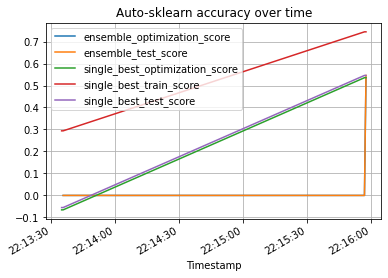

In [125]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print(automl.leaderboard())
poT = automl.performance_over_time_
print(poT)
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)

# Load seller datasets and build market
Currently, we need to specify the join attributes (could be joined on multiple attributes) and these attributes name have to be same across two tables.

We need more data.

The best data increase linear regression R2 to 0.3944023420421897

This data also increase automl R2 to: 0.7970338954417067

In [4]:
# read buyer dataste
crime = pd.read_csv("crime.csv")
crimedata = agg_dataset()
crimedata.load(crime, [], ["DBN"], "crime")
crimedata.find_features()
crimedata.remove_redundant_columns()
crimedata.compute_agg(True)


esl = pd.read_csv("esl.csv")
esldata = agg_dataset()
esldata.load(esl, [], [["DBN","Grade"]], "esl")
esldata.find_features()
esldata.remove_redundant_columns()
esldata.compute_agg(True)

ap = pd.read_csv("ap.csv")
apdata = agg_dataset()
apdata.load(ap, [], ["DBN"], "ap")
apdata.find_features()
apdata.remove_redundant_columns()
apdata.compute_agg(True)

survey = pd.read_csv("2013_NYC_School_Survey.csv")
surveydata = agg_dataset()
surveydata.load(survey, [], ["DBN"], "survey")
surveydata.find_features()
surveydata.remove_redundant_columns()
surveydata.compute_agg(True)

base = pd.read_csv("base.csv")
basedata = agg_dataset()
basedata.load(base, [], ["DBN"], "base")
basedata.find_features()
basedata.remove_redundant_columns()
basedata.compute_agg(True)

disc = pd.read_csv("disc.csv")
discdata = agg_dataset()
discdata.load(disc, [], ["DBN"], "disc")
discdata.find_features()
discdata.remove_redundant_columns()
discdata.compute_agg(True)

math = pd.read_csv("math.csv")
mathdata = agg_dataset()
mathdata.load(math, [], [["DBN","Grade"]], "math")
mathdata.find_features()
mathdata.remove_redundant_columns()
mathdata.compute_agg(True)

oss = pd.read_csv("oss.csv")
ossdata = agg_dataset()
ossdata.load(oss, [], ["DBN"], "oss")
ossdata.find_features()
ossdata.remove_redundant_columns()
ossdata.compute_agg(True)

pe = pd.read_csv("pe.csv")
pedata = agg_dataset()
pedata.load(pe, [], ["DBN"], "pe")
pedata.find_features()
pedata.remove_redundant_columns()
pedata.compute_agg(True)

s2tr = pd.read_csv("s2tr.csv")
s2trdata = agg_dataset()
s2trdata.load(s2tr, [], ["DBN"], "s2tr")
s2trdata.find_features()
s2trdata.remove_redundant_columns()
s2trdata.compute_agg(True)

sat = pd.read_csv("sat.csv")
satdata = agg_dataset()
satdata.load(sat, [], ["DBN"], "sat")
satdata.find_features()
satdata.remove_redundant_columns()
satdata.compute_agg(True)

pro = pd.read_csv("Schools_Progress_Report_2012-2013.csv")
prodata = agg_dataset()
prodata.load(pro, [], ["DBN"], "pro")
prodata.find_features()
prodata.remove_redundant_columns()
prodata.compute_agg(True)


spy = pd.read_csv("spy.csv")
spydata = agg_dataset()
spydata.load(spy, [], ["Year"], "spy")
spydata.find_features()
spydata.remove_redundant_columns()
spydata.compute_agg(True)

transfer = pd.read_csv("transfer.csv")
transferdata = agg_dataset()
transferdata.load(transfer, [], ["DBN"], "transfer")
transferdata.find_features()
transferdata.remove_redundant_columns()
transferdata.compute_agg(True)

yabc = pd.read_csv("yabc.csv")
yabcdata = agg_dataset()
yabcdata.load(yabc, [], ["DBN"], "yabc")
yabcdata.find_features()
yabcdata.remove_redundant_columns()
yabcdata.compute_agg(True)

dm1 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.22rr-ujq3")
dm1data = agg_dataset()
dm1data.load(dm1, [], ["DBN"], "dm1")
dm1data.find_features()
dm1data.remove_redundant_columns()
dm1data.compute_agg(True)

dm2 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.25aa-q86c")
dm2data = agg_dataset()
dm2data.load(dm2, [], ["DBN"], "dm2")
dm2data.find_features()
dm2data.remove_redundant_columns()
dm2data.compute_agg(True)

dm3 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29bv-qqsy")
dm3data = agg_dataset()
dm3data.load(dm3, [], ["DBN"], "dm3")
dm3data.find_features()
dm3data.remove_redundant_columns()
dm3data.compute_agg(True)

dm4 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29ry-u5bf")
dm4data = agg_dataset()
dm4data.load(dm4, [], ["DBN"], "dm4")
dm4data.find_features()
dm4data.remove_redundant_columns()
dm4data.compute_agg(True)

dm5 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.43qc-8vv8")
dm5data = agg_dataset()
dm5data.load(dm5, [], [["DBN","Grade"]], "dm5")
dm5data.find_features()
dm5data.remove_redundant_columns()
dm5data.compute_agg(True)

/home/jupyter/arda/arda-datasets/school/datamarket.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.data['cov:Q:' + tablename + ":" + attributes[i] + ","+ tablename + ":" + attributes[j]] = self.data[attributes[i]] * self.data[attributes[j]]


In [6]:

math = pd.read_csv("math.csv")
mathdata = agg_dataset()
mathdata.load(math, [], [["DBN","Grade"]], "math")
mathdata.find_features()
mathdata.remove_redundant_columns()
mathdata.compute_agg(True)


In [5]:
%%time
sellers = [(crimedata, "DBN"), (apdata, "DBN"), (surveydata, "DBN"), 
           (basedata, "DBN"), (discdata, "DBN"), (mathdata, ("DBN","Grade")), 
           (ossdata, "DBN"), (pedata, "DBN"), (s2trdata, "DBN"), 
           (satdata, "DBN"), (prodata, "DBN"), (spydata, "Year"),
           (transferdata, "DBN"), (yabcdata, "DBN"), (dm1data, "DBN"),
           (dm2data, "DBN"), (dm3data, "DBN"), (dm4data, "DBN"), (dm5data, ("DBN","Grade"))]

# sellers = [(mathdata, ("DBN","Grade"))]


# find m best datasets to augment
bought = set()
m = 1
y = "Mean Scale Score"

for i in range(m):
    best_seller = None
    best_seller_attrs = []
    best_dimension = None
    best_r2 = 0

    for sellerdata, dimension in sellers:
        # check if current seller has been bought
        if sellerdata.name in bought:
            continue
        print(sellerdata.name)

        # find the attributes and r2 of augmenting
        cur_atts, final_r2 = select_features(gender_train_data, gender_test_data, sellerdata, dimension, 4, y)
#         cur_atts, final_r2 = select_features(gender_train, gender_test, sellerdata, dimension,10)

        if final_r2 > best_r2:
            best_seller = sellerdata
            best_dimension = dimension
            best_seller_attrs = cur_atts
            best_r2 = final_r2


    print(best_seller.name, best_seller_attrs, best_r2)
    
    if len([x for x in best_seller_attrs if x in best_seller.X]) == 0:
        gender_train_data.datasets.add(best_seller)
        gender_test_data.datasets.add(best_seller)
    else:
        gender_train_data.absorb(best_seller, best_dimension, best_seller_attrs + [gender_train_data.name + ":" + y])
        gender_test_data.absorb(best_seller, best_dimension, best_seller_attrs + [gender_train_data.name + ":" + y])

crime
ap
survey


/home/jupyter/arda/arda-datasets/school/datamarket.py:350: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  join.drop('cov:c_y', 1, inplace=True)


base
disc
math
oss
pe
s2tr
sat
pro
spy
transfer
yabc
dm1
dm2
dm3
dm4
dm5
math ['math:Level 4 %', 'math:Level 1 %', 'math:Year', 'gender:Number Tested'] 0.39912150991381046
CPU times: user 2.23 s, sys: 29.1 ms, total: 2.26 s
Wall time: 2.25 s


In [14]:
gender_train_data.data.set_index(list(('DBN', 'Grade')))

cov:s:gender:Mean Scale Score  \
DBN    Grade                                       
01M015 3                                   285.0   
       3                                   289.0   
       3                                   276.0   
       3                                   308.0   
       3                                   297.0   
...                                          ...   
32K562 All Grades                          280.0   
       All Grades                          274.0   
       All Grades                          286.0   
       All Grades                          282.0   
       All Grades                          284.0   

                   cov:Q:gender:Mean Scale Score,gender:Mean Scale Score  \
DBN    Grade                                                               
01M015 3                                                     81225.0       
       3                                                     83521.0       
       3                                                     76176.0       
       3                                                     94864.0       
       3                                                     88209.0       
...                                                              ...       
32K562 All Grades                                            78400.0       
       All Grades                                            75076.0       
       All Grades                                            81796.0       
       All Grades                                            79524.0       
       All Grades                                            80656.0       

                   cov:c Category  Year  
DBN    Grade                             
01M015 3               1   Female  2013  
       3               1   Female  2015  
       3               1     Male  2015  
       3               1   Female  2017  
       3               1     Male  2017  
...                  ...      ...   ...  
32K562 All Grades      1   Female  2015  
       All Grades      1     Male  2015  
       All Grades      1   Female  2016  
       All Grades      1     Male  2016  
       All Grades      1     Male  2017  

[37918 rows x 5 columns]

In [114]:
# %%time
# c=connect(gender_train_data, mathdata, ("DBN","Grade"))

CPU times: user 99.1 ms, sys: 0 ns, total: 99.1 ms
Wall time: 97.2 ms


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:298: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [55]:
best_dimension = ['DBN', 'Grade']

In [6]:
# make best_dimension a list
if isinstance(best_dimension, tuple):
    best_dimension = list(best_dimension)
else:
    best_dimension = [best_dimension]

# extract needed attributes
seller_features = ['cov:s:' +  attr for attr in best_seller_attrs  if attr.startswith(best_seller.name)]
buyer_features = ['cov:s:' +  attr for attr in best_seller_attrs  if not attr.startswith(best_seller.name)]
target = ['cov:s:gender:' + y]
buyer_train_data = gender_train_data.data[gender_train_data.dedup_dimensions + buyer_features + target]
buyer_test_data = gender_test_data.data[gender_train_data.dedup_dimensions + buyer_features + target]
seller_data = best_seller.data[best_dimension + seller_features]
# seller_data = seller_data.groupby(best_dimension).mean()

# join buyer and seller
join_train = pd.merge(buyer_train_data,seller_data,how='left', on=best_dimension)
join_test = pd.merge(buyer_test_data,seller_data,how='left', on=best_dimension)

In [8]:
join_train

,DBN,Category,Grade,Year,cov:s:gender:Number Tested,cov:s:gender:Mean Scale Score,cov:s:math:Level 4 %,cov:s:math:Level 1 %,cov:s:math:Year
0,01M015,Female,3,2013,12,285.0,15.400000,5.100000,2006.000000
1,01M015,Female,3,2013,12,285.0,12.900000,6.500000,2007.000000
2,01M015,Female,3,2013,12,285.0,5.400000,0.000000,2008.000000
3,01M015,Female,3,2013,12,285.0,3.000000,0.000000,2009.000000
4,01M015,Female,3,2013,12,285.0,7.700000,23.100000,2010.000000
...,...,...,...,...,...,...,...,...,...
201530,32K562,Female,All Grades,2015,148,280.0,20.322622,9.732634,2008.556781
201531,32K562,Male,All Grades,2015,161,274.0,20.322622,9.732634,2008.556781
201532,32K562,Female,All Grades,2016,125,286.0,20.322622,9.732634,2008.556781
201533,32K562,Male,All Grades,2016,141,282.0,20.322622,9.732634,2008.556781


In [9]:
# missing value imputation
for attr in best_seller_attrs:
    if attr in best_seller.covariance:
        join_train["cov:s:" + attr].fillna(best_seller.covariance["cov:s:" + attr], inplace=True)
        join_test["cov:s:" + attr].fillna(best_seller.covariance["cov:s:" + attr], inplace=True)

In [10]:
def one_one_encoding(relation, attributes):
    one_hot_encoding_relations = [relation]
    for attr in attributes:
        one_hot_encoding_relations.append(pd.get_dummies(relation[attr], prefix=attr))
    encoded_relation = pd.concat(one_hot_encoding_relations, axis=1)
    encoded_relation.drop(columns=attributes, inplace=True)
    return encoded_relation

# join_train = one_one_encoding(join_train, gender_train_data.dedup_dimensions)
# join_test = one_one_encoding(join_test, gender_train_data.dedup_dimensions)

In [11]:
join_train_len = len(join_train)
join = pd.concat([join_train, join_test])
join = one_one_encoding(join, gender_train_data.dedup_dimensions)
join_train = join.iloc[:join_train_len]
join_test = join.iloc[join_train_len:]

In [13]:
join.to_csv("math_gender_join.csv", index=False)

In [96]:
# join_train = join_train[['cov:s:gender:Mean Scale Score','cov:s:math:Level 4 %', 'cov:s:math:Level 1 %', 'cov:s:math:Year','cov:s:math:Mean Scale Score']]
# join_test = join_test[['cov:s:gender:Mean Scale Score','cov:s:math:Level 4 %', 'cov:s:math:Level 1 %', 'cov:s:math:Year','cov:s:math:Mean Scale Score']]

In [20]:
# join_train = join_train.astype({'DBN': 'category', 'Year': 'category', "Grade": 'category', "Category": 'category'})
# join_test = join_test.astype({'DBN': 'category', 'Year': 'category', "Grade": 'category', "Category": 'category'})

In [14]:
y_train = join_train[target]
y_test = join_test[target]
X_train = join_train.drop(columns=target)
X_test = join_test.drop(columns=target)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [119]:
for att in X_train.columns:
    if att not in X_test.columns:
        print(att)

In [86]:
%%time
clf = GradientBoostingClassifier(n_estimators=1, max_leaf_nodes=8).fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


CPU times: user 1min 21s, sys: 11.5 s, total: 1min 33s
Wall time: 1min 33s


In [36]:
len(X_train)

201535

In [54]:
%%time
clf = RandomForestClassifier(max_depth = 20,random_state=1, n_estimators=100)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


CPU times: user 58 s, sys: 1.75 s, total: 59.7 s
Wall time: 59.7 s


RandomForestClassifier(max_depth=20, random_state=1)

In [21]:
clf.predict(X_test)

array([294., 294., 294., ..., 294., 294., 294.])

In [22]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_test, clf.predict(X_test))

0.6030808485885308

In [ ]:
print("hi")


In [41]:
from math import log

In [57]:
len(X_train.columns)

1156

In [52]:
log(201535)* 201535 /log(10000)/10000

26.725306848120603

In [61]:
%%time
# model performance with autoML 
X_train = join_train[gender_train_data.dedup_dimensions + seller_features + buyer_features]
y_train = join_train[target]
X_test = join_test[gender_train_data.dedup_dimensions + seller_features + buyer_features]
y_test = join_test[target]

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=600,
    per_run_time_limit=200,
    memory_limit=6072
)
automl.fit(X_train, y_train, X_test, y_test, dataset_name='gender')

CPU times: user 869 ms, sys: 783 ms, total: 1.65 s
Wall time: 9min 55s


AutoSklearnRegressor(memory_limit=6072, per_run_time_limit=200,
                     time_left_for_this_task=600)

In [62]:
now = datetime.now()
now_aug = now
current_time = now_aug.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 03:27:21


Train R2 score: 0.8435963958321469
Test R2 score: 0.801552346515525
          rank  ensemble_weight               type     cost    duration
model_id                                                               
4            1              1.0  gradient_boosting  0.18139  166.533375
                   Timestamp  ensemble_optimization_score  \
0 2022-03-13 03:18:33.486294                    -0.000003   
3 2022-03-13 03:24:41.000000                    -0.000003   
4 2022-03-13 03:24:41.000000                    -0.000003   
1 2022-03-13 03:24:41.668849                     0.818610   
2 2022-03-13 03:24:41.668849                     0.818610   

   ensemble_test_score  single_best_optimization_score  \
0            -0.000112                             NaN   
3            -0.000112                         0.81861   
4            -0.000112                         0.81861   
1             0.801552                         0.81861   
2             0.801552                         0.81861   



<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

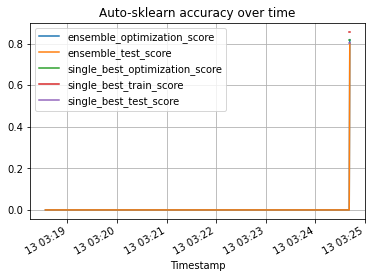

In [63]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print(automl.leaderboard())
poT = automl.performance_over_time_
print(poT)
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)

In [64]:
poT2 = poT 

Train R2 score: 0.8417184044415904
Test R2 score: 0.7970338954417067
          rank  ensemble_weight               type      cost   duration
model_id                                                               
4            1              1.0  gradient_boosting  0.181931  175.89374
                   Timestamp  ensemble_optimization_score  \
0 2022-03-11 00:09:47.064354                    -0.000038   
2 2022-03-11 00:17:43.000000                    -0.000038   
1 2022-03-11 00:17:43.318110                     0.818069   

   ensemble_test_score  single_best_optimization_score  \
0            -0.000036                             NaN   
2            -0.000036                        0.818069   
1             0.797034                        0.818069   

   single_best_train_score  single_best_test_score  
0                      NaN                     NaN  
2                 0.853446                0.797034  
1                 0.853446                0.797034  


<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

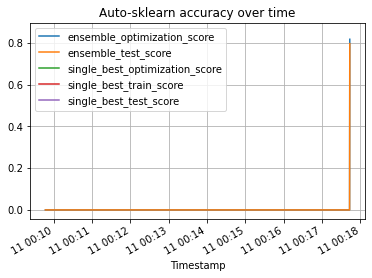

In [242]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print(automl.leaderboard())
poT = automl.performance_over_time_
print(poT)
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)

In [115]:
poT2 = automl.performance_over_time_

In [119]:
poT2["Timestamp"] - min(poT2["Timestamp"])

0          0 days 00:00:00
5   0 days 00:02:30.958160
6   0 days 00:02:30.958160
1   0 days 00:02:31.712754
2   0 days 00:02:45.958601
7   0 days 00:05:02.958160
8   0 days 00:05:02.958160
3   0 days 00:05:03.972905
4   0 days 00:05:03.972905
Name: Timestamp, dtype: timedelta64[ns]

In [120]:
automl.sprint_statistics()

'auto-sklearn results:\n  Dataset name: gender\n  Metric: r2\n  Best validation score: 0.692699\n  Number of target algorithm runs: 9\n  Number of successful target algorithm runs: 4\n  Number of crashed target algorithm runs: 0\n  Number of target algorithms that exceeded the time limit: 2\n  Number of target algorithms that exceeded the memory limit: 3\n'